### Ejemplo de Análisis de Componentes Principales para clasificación con SVM
Datos: La información para este ejemplo es un dataset genérico de la flor "Iris (2015)" que contiene 150 datos sobre tres variedades de esta planta: setosa, versicolor y virginica.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

In [2]:
#Datos
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


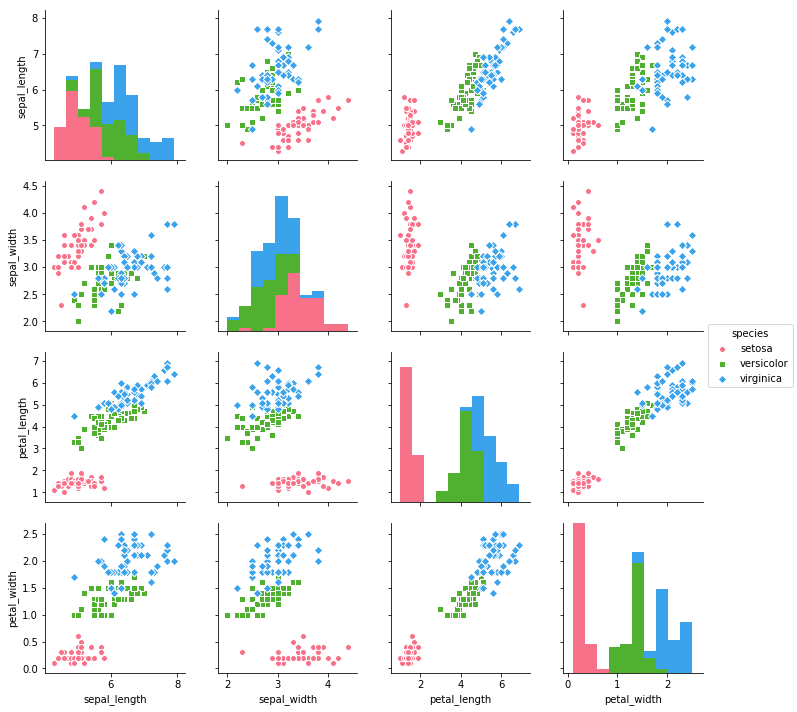

In [4]:
sns.pairplot(data, hue="species", palette="husl", markers=["o", "s", "D"])

In [5]:
#conversion de datos categoricos a datos numéricos
data["species"].replace(["setosa", "versicolor", "virginica"], [0,1,2], inplace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#PCA
pca = PCA(n_components=5).fit(data)

In [7]:
#Varianza explicada
expl_var =pca.explained_variance_ratio_

Varianza Explicada para cada componente:
[0.92264373 0.04812763 0.01826454 0.00698983 0.00397426] 



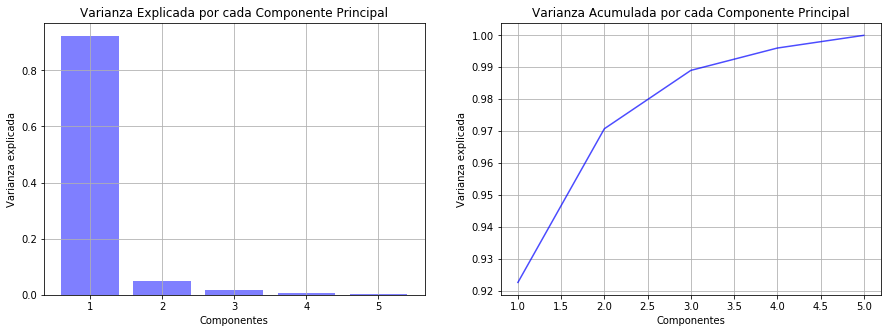

In [11]:
#Grafico de varianza explicada por cada componente

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.bar(np.linspace(1,5,5),expl_var, color="blue", alpha=0.5)
plt.title("Varianza Explicada por cada Componente Principal")
plt.xlabel("Componentes")
plt.ylabel("Varianza explicada")
plt.grid()

plt.subplot(122)
plt.plot(np.linspace(1,5,5),expl_var.cumsum(), color="blue", alpha=0.7)
plt.title("Varianza Acumulada por cada Componente Principal")
plt.xlabel("Componentes")
plt.ylabel("Varianza explicada")
plt.grid()

print("Varianza Explicada para cada componente:")
print(expl_var, "\n")

> Como se puede observar, con 3 componentes principales se puede explicar el 99% de la varianza. Pero la cantidad optima de componentes es 2, dado que el tercer componente explica solamente ~2% de la varianza.

In [12]:
#Componentes principales selecionados 2
comp = PCA(n_components=5)

In [15]:
#fit_transform devuelve el producto de la traspuesta de los autovectores del pca por la traspuesta de los datos centrados
# Projected = autovectores * datos centrados

projected = comp.fit_transform(data)
projected.shape

(150, 5)

In [17]:
pca.explained_variance_ratio_

array([0.92264373, 0.04812763, 0.01826454, 0.00698983, 0.00397426])

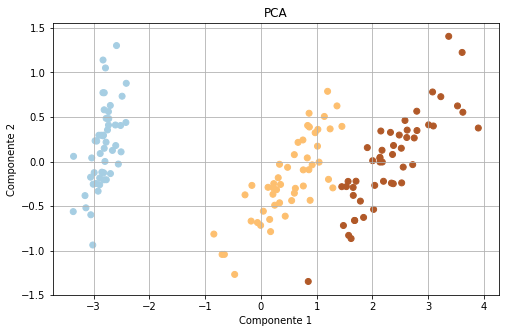

In [21]:
#Visualizaciónde los componentes principales:
plt.figure(figsize=(8,5))
plt.scatter(projected[:,0], projected[:,1], c=data["species"], cmap = 'Paired')
plt.title("PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()

> Como es claro en la visualizacion, con 2 componentes se puede identificar facilmente el tipo de planta. Por lo que es fácil clasificar las plantas con una maquina de soporte vectorial

In [44]:
X = projected[:,0:2]   #Componentes
Y = data["species"]    #Datos objetivo

from sklearn import svm

In [45]:
sv = svm.SVC(kernel='linear', C=1).fit(X, Y)

In [46]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

In [49]:
Z = sv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

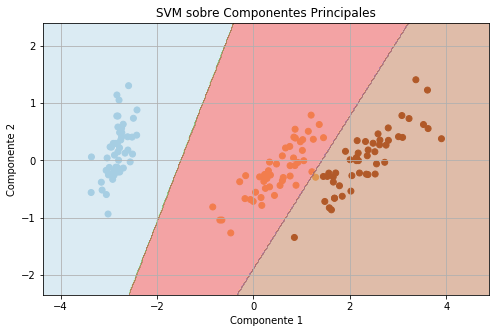

In [57]:
plt.figure(figsize=(8,5))
plt.scatter(projected[:,0], projected[:,1], c=data["species"], cmap = 'Paired')
plt.contourf(xx, yy, Z, alpha=0.4, cmap = 'Paired')
plt.title("SVM sobre Componentes Principales")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()

In [61]:
#Exactitud del modelo 
sv.score(X,Y)

0.9933333333333333

###### Fuentes:
- Amat Rodrigo (2017) Análisis de Componentes Principales (Principal Component Analysis, PCA) y t-SNE. Extraído el 09 de septiembre 2020 de: https://www.cienciadedatos.net/documentos/35_principal_component_analysis
- VanderPlas J. (s.f.) In-Depth: Support Vector Machines.  Python Data Science Handbook. Extraído el 10 de septiembre 2020 de: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
- VanderPlas J. (s.f.) In Depth: Principal Component Analysis.  Python Data Science Handbook. Extraído el 09 de septiembre 2020 de: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- UnADM (s.f.) Unidad 2 Minería de Datos. Computación II. Universidad Abierta y a Distancia de México. Clave 05142423/06142423